# Introduction

From the merger of the ABA and NBA to the new In-Season Tournament, the NBA has been through many different eras that each came with revolutionary changes to the game. One of the most important eras is that of today with the 3-Point Revolution who's inception can be traced to the implementation of the radical 3-Point line in 1976. Anyone who has followed the NBA over the course of the past 10 years can see with just their eyes the boom of the 3-Point shot and how the product of the court is impacted greatly by it when in the decades before it had not.

In this study, NBA game and season data from the 1999–2000 to 2022–2023 regular season is analyzed to observe 3-Point shooting trends in the NBA and provide a scoring analysis that looks into habits of players today.

**Questions to keep in mind**
1. When and how did the NBA 3-Point boom really arrive within the span of the past 20 years?
2. What are some common shotting habits that players today have opposed to their old veteran counterparts from the early 2000s

In [1]:
#Our imports
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick
from matplotlib.ticker import PercentFormatter
from matplotlib.ticker import FuncFormatter

# Data Overview

For this exploration of 3-Point shooting we'll be implementing the use of 3 different data sets.



* **Team Stats Dataset**:

This Data set mostly comprises of Field Goal make and attamp rates by teams over the course of many seasons

In [2]:
#importing Team Stats DataFrame
team_totals = pd.read_csv('/kaggle/input/nba-datasets/Team Stats Per Game.csv')

#only including the seasons between 1999 and 2023
team_totals = team_totals.loc[(team_totals['season'] < 2024) & (team_totals['season'] > 1999)]

#show a preview of the DataFrame
print(team_totals.info())
team_totals.head()

<class 'pandas.core.frame.DataFrame'>
Index: 739 entries, 31 to 769
Data columns (total 28 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   season         739 non-null    int64  
 1   lg             739 non-null    object 
 2   team           739 non-null    object 
 3   abbreviation   715 non-null    object 
 4   playoffs       739 non-null    bool   
 5   g              739 non-null    float64
 6   mp_per_game    739 non-null    float64
 7   fg_per_game    739 non-null    float64
 8   fga_per_game   739 non-null    float64
 9   fg_percent     739 non-null    float64
 10  x3p_per_game   739 non-null    float64
 11  x3pa_per_game  739 non-null    float64
 12  x3p_percent    739 non-null    float64
 13  x2p_per_game   739 non-null    float64
 14  x2pa_per_game  739 non-null    float64
 15  x2p_percent    739 non-null    float64
 16  ft_per_game    739 non-null    float64
 17  fta_per_game   739 non-null    float64
 18  ft_percent    

,season,lg,team,abbreviation,playoffs,g,mp_per_game,fg_per_game,fga_per_game,fg_percent,...,ft_percent,orb_per_game,drb_per_game,trb_per_game,ast_per_game,stl_per_game,blk_per_game,tov_per_game,pf_per_game,pts_per_game
31,2023,NBA,Atlanta Hawks,ATL,False,82.0,242.1,44.6,92.4,0.483,...,0.818,11.2,33.2,44.4,25.0,7.1,4.9,12.9,18.8,118.4
32,2023,NBA,Boston Celtics,BOS,False,82.0,243.7,42.2,88.8,0.475,...,0.812,9.7,35.6,45.3,26.7,6.4,5.2,13.4,18.8,117.9
33,2023,NBA,Brooklyn Nets,BRK,False,82.0,240.6,41.5,85.1,0.487,...,0.800,8.2,32.3,40.5,25.5,7.1,6.2,13.7,21.1,113.4
34,2023,NBA,Chicago Bulls,CHI,False,82.0,242.7,42.5,86.8,0.490,...,0.809,8.5,33.9,42.4,24.5,7.9,4.5,13.4,18.9,113.1
35,2023,NBA,Charlotte Hornets,CHO,False,82.0,241.8,41.3,90.4,0.457,...,0.749,11.0,33.5,44.5,25.1,7.7,5.2,14.2,20.3,111.0


* **Indiviual Player Shooting Dataset**:

This dataset focuses on examining player shooting rates from diffeent distances on the basketball court

In [3]:
#importing Player Shooting DataFrame
player_shooting = pd.read_csv('/kaggle/input/nba-datasets/Player Shooting.csv')


#dropping column that have no use in analysis and most values were NA
player_shooting.drop(['num_heaves_made', 'num_heaves_attempted', 'birth_year', 'num_of_dunks', 'percent_dunks_of_fga', 'percent_assisted_x2p_fg', 'percent_assisted_x3p_fg', 'percent_corner_3s_of_3pa', 'corner_3_point_percent'], 
                  axis=1, 
                  inplace=True)

#cleaning up postion column as there are players with double postion labels (ex: "PG-SG")
player_shooting['pos'] = player_shooting['pos'].str.replace('-SG', '')
player_shooting['pos'] = player_shooting['pos'].str.replace('-SF', '')
player_shooting['pos'] = player_shooting['pos'].str.replace('-C', '')
player_shooting['pos'] = player_shooting['pos'].str.replace('-PF', '')
player_shooting['pos'] = player_shooting['pos'].str.replace('-PG', '')
player_shooting['pos'] = player_shooting['pos'].str.replace('-PG-SF', '')

#renaming some columns for clarity
player_shooting.rename(columns = {'pos':'Position', 'lg':'league', 'tm':'team', 'g':'game within season', 'mp':'minutes played'}, 
                    inplace = True)

#only including the seasons between 1999 and 2023
player_shooting = player_shooting.loc[(player_shooting['season'] < 2024) & (player_shooting['season'] > 1999)]

#dropping NA values
player_shooting = player_shooting.dropna()

#previewing the DataFrame            
print(player_shooting.info())
player_shooting.head()

<class 'pandas.core.frame.DataFrame'>
Index: 11198 entries, 415 to 14835
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   seas_id                        11198 non-null  int64  
 1   season                         11198 non-null  int64  
 2   player_id                      11198 non-null  int64  
 3   player                         11198 non-null  object 
 4   Position                       11198 non-null  object 
 5   age                            11198 non-null  int64  
 6   experience                     11198 non-null  int64  
 7   league                         11198 non-null  object 
 8   team                           11198 non-null  object 
 9   game within season             11198 non-null  int64  
 10  minutes played                 11198 non-null  int64  
 11  fg_percent                     11198 non-null  float64
 12  avg_dist_fga                   11198 non-null  fl

,seas_id,season,player_id,player,Position,age,experience,league,team,game within season,...,percent_fga_from_x3_10_range,percent_fga_from_x10_16_range,percent_fga_from_x16_3p_range,percent_fga_from_x3p_range,fg_percent_from_x2p_range,fg_percent_from_x0_3_range,fg_percent_from_x3_10_range,fg_percent_from_x10_16_range,fg_percent_from_x16_3p_range,fg_percent_from_x3p_range
415,30458,2023,5025,A.J. Green,SG,23,1,NBA,MIL,35,...,0.016,0.032,0.072,0.840,0.450,0.400,0.500,0.500,0.444,0.419
419,30467,2023,5027,AJ Griffin,SF,19,1,NBA,ATL,72,...,0.165,0.173,0.075,0.486,0.536,0.630,0.568,0.522,0.375,0.390
420,30462,2023,4219,Aaron Gordon,PF,27,9,NBA,DEN,68,...,0.183,0.064,0.037,0.227,0.628,0.782,0.388,0.286,0.357,0.347
421,30463,2023,4582,Aaron Holiday,PG,26,5,NBA,ATL,63,...,0.168,0.132,0.077,0.400,0.424,0.612,0.216,0.310,0.529,0.409
422,30464,2023,4805,Aaron Nesmith,SF,23,3,NBA,IND,73,...,0.136,0.063,0.020,0.532,0.496,0.639,0.263,0.486,0.333,0.366


* **Positional Shooting DataFrame**:

These collection of datasets provide positional data of everyshot attempted by every player in the NBA within their respected season

In [4]:
#Import out shot location datasets for the years we will be using
shots_04 = pd.read_csv("/kaggle/input/nba-datasets/NBA_2004_Shots.csv")
shots_07 = pd.read_csv("/kaggle/input/nba-datasets/NBA_2007_Shots.csv")
shots_11 = pd.read_csv("/kaggle/input/nba-datasets/NBA_2011_Shots.csv")
shots_15 = pd.read_csv("/kaggle/input/nba-datasets/NBA_2015_Shots.csv")
shots_19 = pd.read_csv("/kaggle/input/nba-datasets/NBA_2019_Shots.csv")
shots_23 = pd.read_csv("/kaggle/input/nba-datasets/NBA_2023_Shots.csv")

#Changing decimal place in X and Y coordinates to fit shot chart we'll be using
shots_04[['LOC_X', 'LOC_Y']] = (shots_04[['LOC_X', 'LOC_Y']]*10)
shots_07[['LOC_X', 'LOC_Y']] = (shots_07[['LOC_X', 'LOC_Y']]*10)
shots_11[['LOC_X', 'LOC_Y']] = (shots_11[['LOC_X', 'LOC_Y']]*10)
shots_15[['LOC_X', 'LOC_Y']] = (shots_15[['LOC_X', 'LOC_Y']]*10)
shots_19[['LOC_X', 'LOC_Y']] = (shots_19[['LOC_X', 'LOC_Y']]*10)
shots_23[['LOC_X', 'LOC_Y']] = (shots_23[['LOC_X', 'LOC_Y']]*10)

#All DataFrames have the same form, previewing just one
print(shots_04.info())
shots_04.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189803 entries, 0 to 189802
Data columns (total 26 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   SEASON_1        189803 non-null  int64  
 1   SEASON_2        189803 non-null  object 
 2   TEAM_ID         189803 non-null  int64  
 3   TEAM_NAME       189803 non-null  object 
 4   PLAYER_ID       189803 non-null  int64  
 5   PLAYER_NAME     189803 non-null  object 
 6   POSITION_GROUP  189803 non-null  object 
 7   POSITION        189803 non-null  object 
 8   GAME_DATE       189803 non-null  object 
 9   GAME_ID         189803 non-null  int64  
 10  HOME_TEAM       189803 non-null  object 
 11  AWAY_TEAM       189803 non-null  object 
 12  EVENT_TYPE      189803 non-null  object 
 13  SHOT_MADE       189803 non-null  bool   
 14  ACTION_TYPE     189803 non-null  object 
 15  SHOT_TYPE       189803 non-null  object 
 16  BASIC_ZONE      189803 non-null  object 
 17  ZONE_NAME 

,SEASON_1,SEASON_2,TEAM_ID,TEAM_NAME,PLAYER_ID,PLAYER_NAME,POSITION_GROUP,POSITION,GAME_DATE,GAME_ID,...,BASIC_ZONE,ZONE_NAME,ZONE_ABB,ZONE_RANGE,LOC_X,LOC_Y,SHOT_DISTANCE,QUARTER,MINS_LEFT,SECS_LEFT
0,2004,2003-04,1610612747,Los Angeles Lakers,977,Kobe Bryant,G,SG,04-14-2004,20301187,...,Above the Break 3,Left Side Center,LC,24+ ft.,200.0,213.5,25,6,0,0
1,2004,2003-04,1610612757,Portland Trail Blazers,757,Damon Stoudamire,G,PG,04-14-2004,20301187,...,Restricted Area,Center,C,Less Than 8 ft.,-0.0,52.5,0,6,0,2
2,2004,2003-04,1610612747,Los Angeles Lakers,977,Kobe Bryant,G,SG,04-14-2004,20301187,...,Mid-Range,Left Side Center,LC,16-24 ft.,133.0,244.5,23,6,0,9
3,2004,2003-04,1610612757,Portland Trail Blazers,757,Damon Stoudamire,G,PG,04-14-2004,20301187,...,Mid-Range,Left Side,L,16-24 ft.,164.0,139.5,18,6,0,31
4,2004,2003-04,1610612757,Portland Trail Blazers,757,Damon Stoudamire,G,PG,04-14-2004,20301187,...,Mid-Range,Right Side,R,16-24 ft.,-158.0,78.5,16,6,0,55


# **Shot Frequency**

Lets take a look at the rates of attempted 3-Point shots vs attempted 2-Point shots

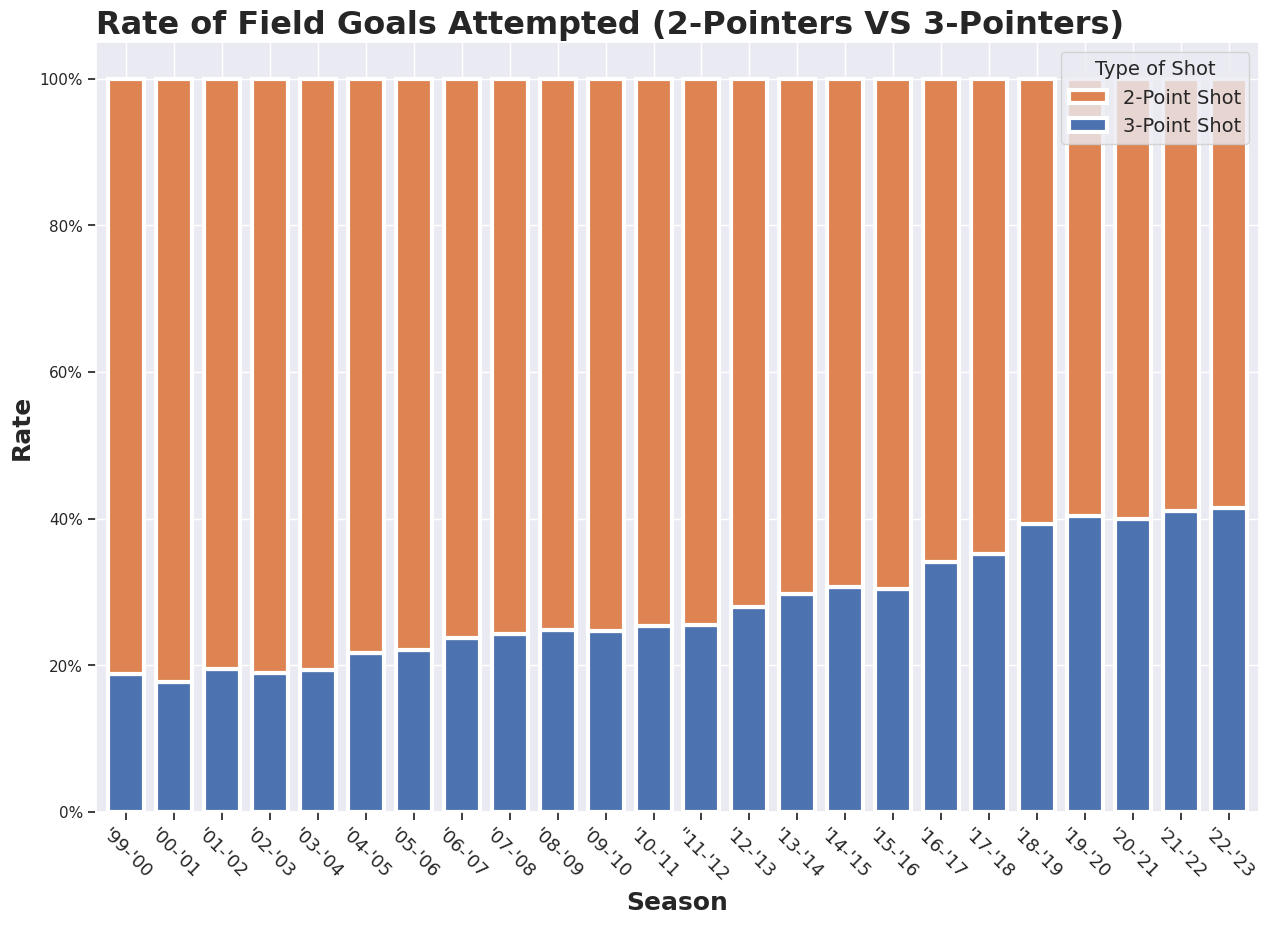

In [5]:
sns.set(rc={"figure.figsize":(15, 10)})
sns.color_palette("tab10")


attempted = player_shooting.groupby('season')\
            [['percent_fga_from_x3p_range', 'percent_fga_from_x2p_range']]\
            .mean()\
            .reset_index()


#plotting
ax = attempted.set_index('season').plot(kind='bar', 
                                   stacked=True,
                                   width = 0.75,
                                   edgecolor = "white", 
                                   linewidth=3)


#formating the ylabels to be percentages instead of decimals
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y)))

#formating the xlabels
ax.set_xticks(range(len(attempted.set_index('season'))))
ax.set_xticklabels(["'99-'00", "'00-'01", "'01-'02", "'02-'03", "'03-'04", "'04-'05", "'05-'06", "'06-'07", "'07-'08", "'08-'09", "'09-'10", "'10-'11", "''11-'12", "'12-'13", "'13-'14", "'14-'15", "'15-'16", "'16-'17", "'17-'18", "'18-'19", "'19-'20", "'20-'21","'21-'22", "'22-'23"], 
                  rotation=-45, size=13)
#ax.set_yticklabels(size=13)
ax.tick_params(bottom=True, left=True)


ax.axes.set_title('Rate of Field Goals Attempted (2-Pointers VS 3-Pointers)',fontsize=23, loc='left', fontweight='bold')
ax.set_xlabel("Season", fontsize=18, fontweight='bold')
ax.set_ylabel("Rate", fontsize=18, fontweight='bold')

#LEGEND
handles, labels = ax.get_legend_handles_labels()
ax.legend(reversed(handles), 
          reversed(["3-Point Shot", "2-Point Shot"]), 
          title='Type of Shot', 
          loc='upper right',
          title_fontsize= 14,
          fontsize = 14)

FRom this one can see that approxiametly 1 in 3 shots attempted by an NBA team is a 3-Pointers

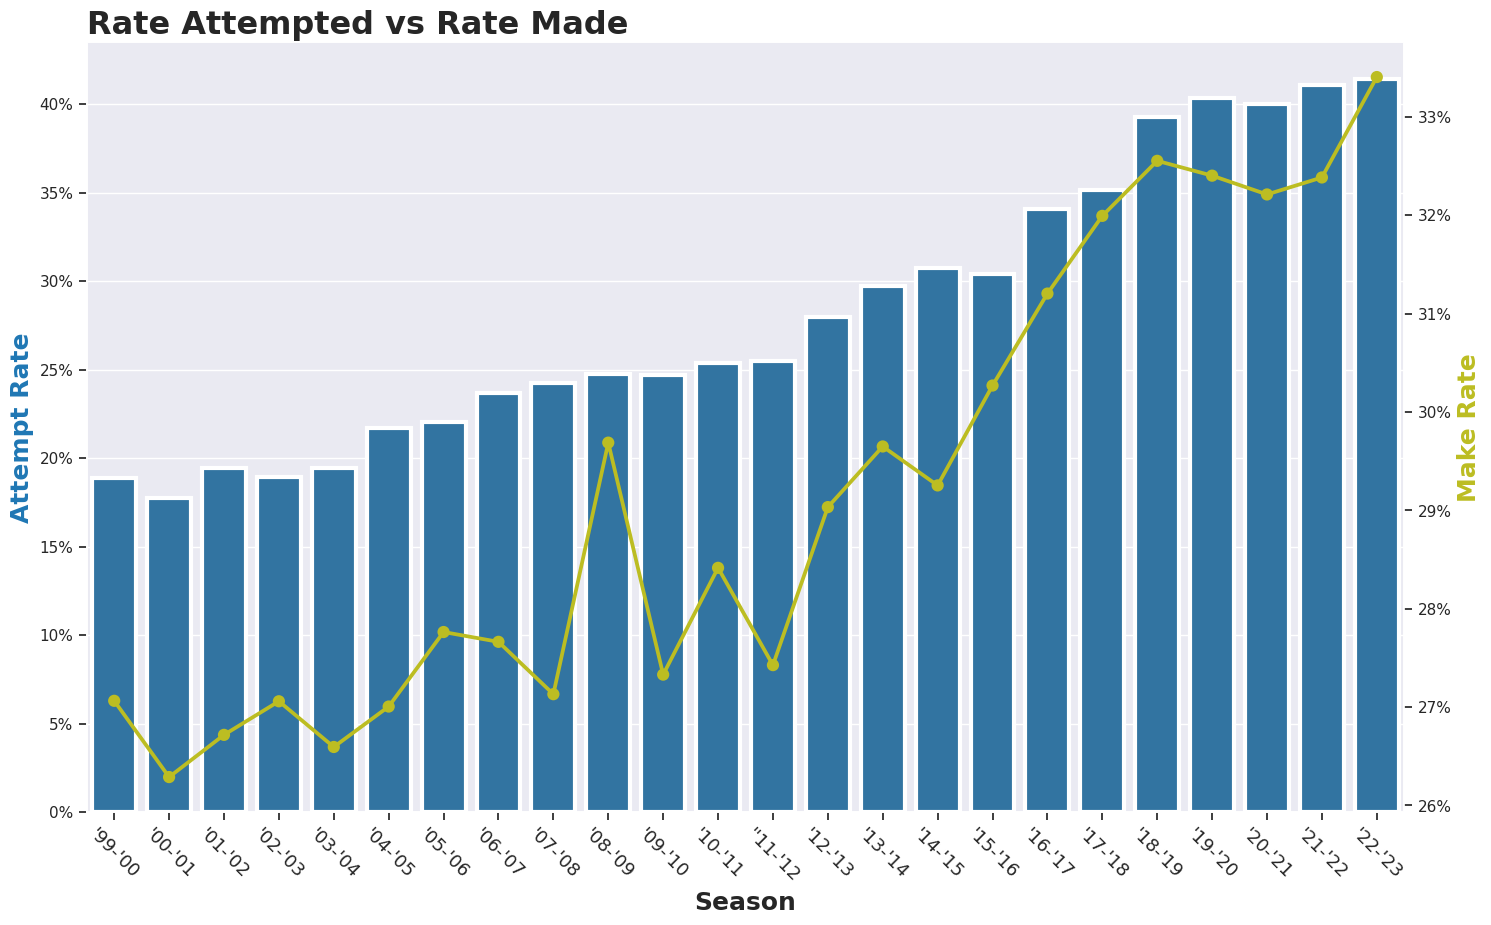

In [6]:
#costumizing plot
fig, ax = plt.subplots(figsize=(17, 10))
sns.set_theme(style="dark", palette='binary')

#plotting
g = sns.barplot(data=player_shooting, 
                x='season', 
                y='percent_fga_from_x3p_range', 
                linewidth=3, 
                errorbar=None, 
                ax=ax, 
                color='tab:blue',
                edgecolor = "white")

ax2 = ax.twinx()
g = sns.pointplot(data=player_shooting, 
                  x='season', 
                  y='fg_percent_from_x3p_range',  
                  errorbar=None, 
                  ax=ax2, 
                 color='tab:olive')

ax.axes.set_title('Rate Attempted vs Rate Made',fontsize=23, loc='left', fontweight='bold')
ax.set_xlabel("Season", fontsize=18, fontweight='bold')
ax.set_ylabel("Attempt Rate", fontsize=18, fontweight='bold', color='tab:blue')
ax2.set_ylabel("Make Rate", fontsize=18, fontweight='bold', color='tab:olive')


#formating the ylabels to be percentages instead of decimals
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y)))
ax2.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y)))

ax.set_xticks(range(24))
ax.set_xticklabels(["'99-'00", "'00-'01", "'01-'02", "'02-'03", "'03-'04", "'04-'05", "'05-'06", "'06-'07", "'07-'08", "'08-'09", "'09-'10", "'10-'11", "''11-'12", "'12-'13", "'13-'14", "'14-'15", "'15-'16", "'16-'17", "'17-'18", "'18-'19", "'19-'20", "'20-'21","'21-'22", "'22-'23"], 
                  rotation=-45, size=13)
ax.tick_params(bottom=True, left=True)

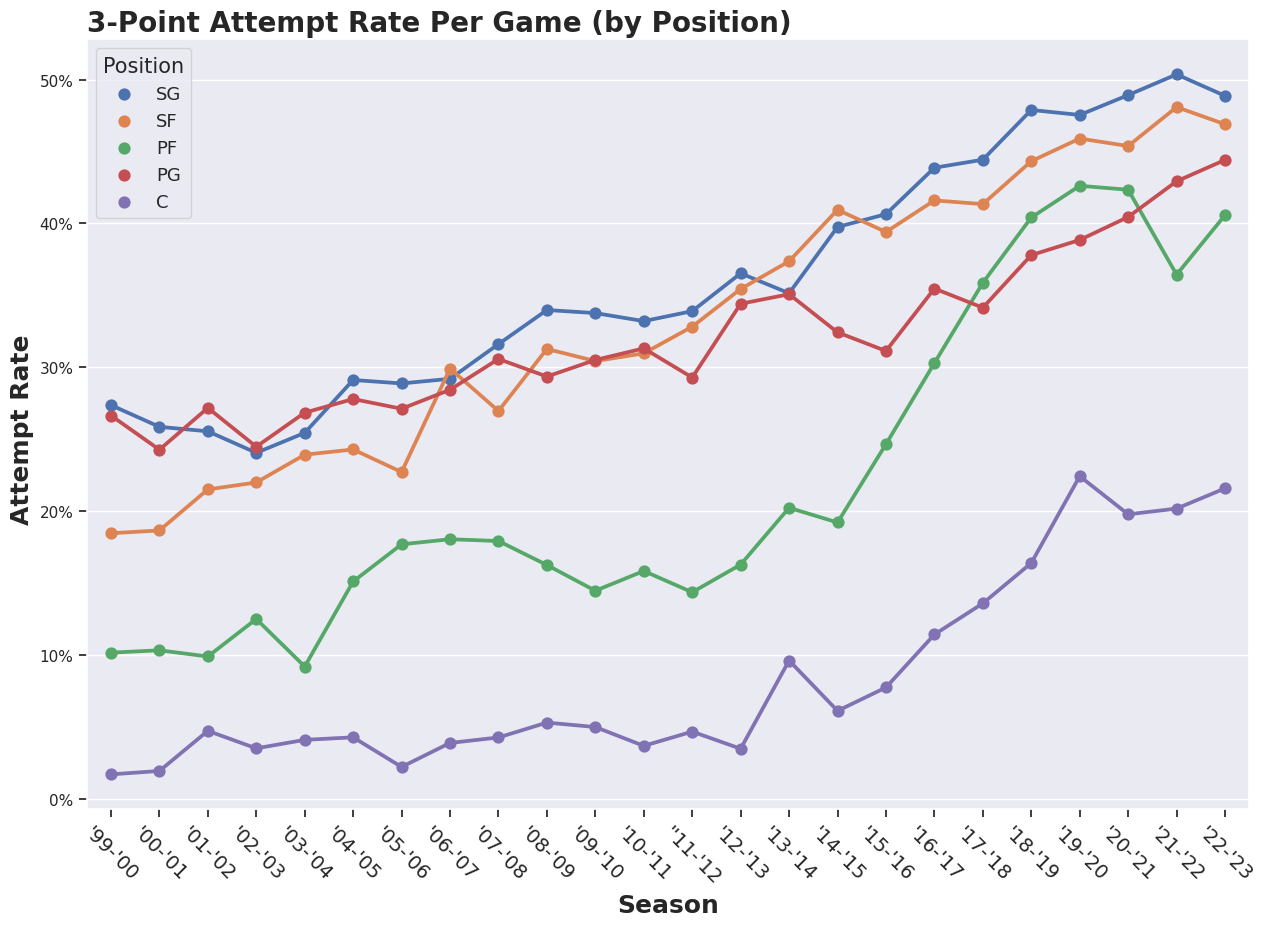

In [7]:
#costumizing plot
sns.set(rc={"figure.figsize":(15, 10)})
sns.set_style("darkgrid")
sns.color_palette("tab10")

#plotting
ax = sns.pointplot(data=player_shooting, x='season', y='percent_fga_from_x3p_range', errorbar=None, hue='Position')


#Labels
ax.axes.set_title('3-Point Attempt Rate Per Game (by Position)',fontsize=20, loc='left', fontweight='bold')
ax.set_xlabel("Season", fontsize=18, fontweight='bold')
ax.set_ylabel("Attempt Rate ", fontsize=18, fontweight='bold')


#formating the ylabels to be percentages instead of decimals
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y)))

#ticks
ax.set_xticks(range(24))
ax.set_xticklabels(["'99-'00", "'00-'01", "'01-'02", "'02-'03", "'03-'04", "'04-'05", "'05-'06", "'06-'07", "'07-'08", "'08-'09", "'09-'10", "'10-'11", "''11-'12", "'12-'13", "'13-'14", "'14-'15", "'15-'16", "'16-'17", "'17-'18", "'18-'19", "'19-'20", "'20-'21","'21-'22", "'22-'23"], 
                  rotation=-45, size=14)
ax.tick_params(bottom=True, left=True)


ax.legend(title='Position', 
          loc='upper left', 
          title_fontsize= 15, 
          fontsize = 13)

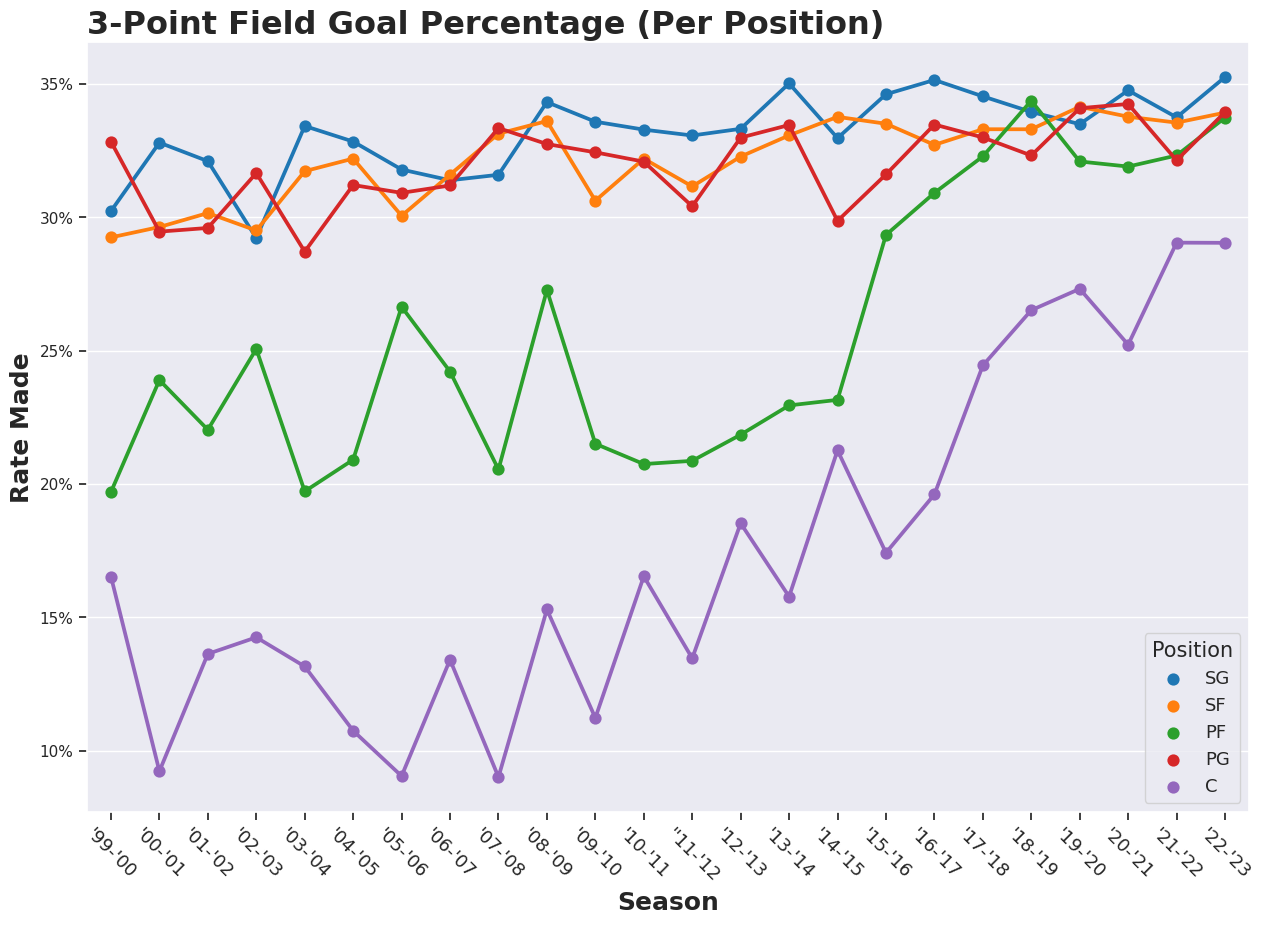

In [8]:
#costumizing plot
fig, ax = plt.subplots(figsize=(15, 10))
sns.set_theme(style="darkgrid", palette="tab10")

#plotting
g = sns.pointplot(data=player_shooting, x='season', y='fg_percent_from_x3p_range', errorbar=None, hue='Position', ax=ax)
#ax2 = ax.twinx()
#g = sns.barplot(data=nba_shooting, x='season', y='percent_fga_from_x3p_range', hue='Position', linewidth=1, ci=None, ax=ax2)

ax.axes.set_title('3-Point Field Goal Percentage (Per Position)',fontsize=23, loc='left', fontweight='bold')
ax.set_xlabel("Season", fontsize=18, fontweight='bold')
ax.set_ylabel("Rate Made", fontsize=18, fontweight='bold')


#formating the ylabels to be percentages instead of decimals
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y)))
#ax2.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y)))

ax.set_xticks(range(24))
ax.set_xticklabels(["'99-'00", "'00-'01", "'01-'02", "'02-'03", "'03-'04", "'04-'05", "'05-'06", "'06-'07", "'07-'08", "'08-'09", "'09-'10", "'10-'11", "''11-'12", "'12-'13", "'13-'14", "'14-'15", "'15-'16", "'16-'17", "'17-'18", "'18-'19", "'19-'20", "'20-'21","'21-'22", "'22-'23"], 
                  rotation=-45, size=13)
ax.tick_params(bottom=True, left=True)


#Legend
ax.legend(title='Position', 
          loc='lower right',
          title_fontsize= 15,
          fontsize = 13)

# **Shot Mapping**

To get a better understanding of what was happening on the court itself one can examine shot location data which gives us the ability to map onto a plane all shots attempted during an entire season 

> **Note:** due to a majority of basketball shots happening directly next to the rim, a maximum cutoff for shots was established when visualizing the entire court so hexbins around the rim would not drown out other hexbins. The maximum cut off chossen was 400 shot

In [9]:
#Drawing basketball court
from matplotlib.patches import Circle, Rectangle, Arc

def draw_court(ax=None, color='white', lw=2, outer_lines=False):
    # If an axes object isn't provided to plot onto, just get current one
    if ax is None:
        ax = plt.gca()
        
    # Create the various parts of an NBA basketball court

    # Create the basketball hoop
    hoop = Circle((0, 55), radius=7.5, linewidth=lw, color="black", fill=False)

    # Create backboard
    backboard = Rectangle((-30, 40), 60, -1, linewidth=lw, color=color)

    # The paint
    outer_box = Rectangle((-80, 0), 160, 190, linewidth=lw, color=color,
                          fill=False)
    # Create the inner box of the paint, widt=12ft, height=19ft
    inner_box = Rectangle((-60, 0), 120, 190, linewidth=lw, color=color,
                          fill=False)

    # Create free throw top arc
    top_free_throw = Arc((0, 190), 120, 120, theta1=0, theta2=180,
                         linewidth=lw, color=color, fill=False)
    # Create free throw bottom arc
    bottom_free_throw = Arc((0, 190), 120, 120, theta1=180, theta2=0,
                            linewidth=lw, color=color, linestyle='dashed')
    # Restricted Zone, it is an arc with 4ft radius from center of the hoop
    restricted = Arc((0, 45), 80, 80, theta1=0, theta2=180, linewidth=lw,
                     color="white")

    # Three point line
    # Create the side 3pt lines, they are 14ft long before they begin to arc
    corner_three_a = Rectangle((-220, 0), 0, 140, linewidth=lw,
                               color=color)
    corner_three_b = Rectangle((220, 0), 0, 140, linewidth=lw, color=color)
    # 3pt arc - center of arc will be the hoop, arc is 23'9" away from hoop
    # I just played around with the theta values until they lined up with the 
    # threes
    three_arc = Arc((0, 50), 475, 475, theta1=22, theta2=158, linewidth=lw,
                    color=color)

    #Center Court
    center_outer_arc = Arc((0, 470), 120, 120, theta1=180, theta2=0,
                           linewidth=lw, color=color)
    center_inner_arc = Arc((0, 470), 40, 40, theta1=180, theta2=0,
                           linewidth=lw, color=color)

    # List of the court elements to be plotted onto the axes
    court_elements = [hoop, backboard, outer_box, inner_box, top_free_throw,
                      bottom_free_throw, restricted, corner_three_a,
                      corner_three_b, three_arc, center_outer_arc,
                      center_inner_arc]

    if outer_lines:
        # Draw the half court line, baseline and side out bound lines
        outer_lines = Rectangle((-250, 470), 500, 470, linewidth=lw,
                                color=color, fill=False)
        court_elements.append(outer_lines)

    # Add the court elements onto the axes
    for element in court_elements:
        ax.add_patch(element)

    return ax

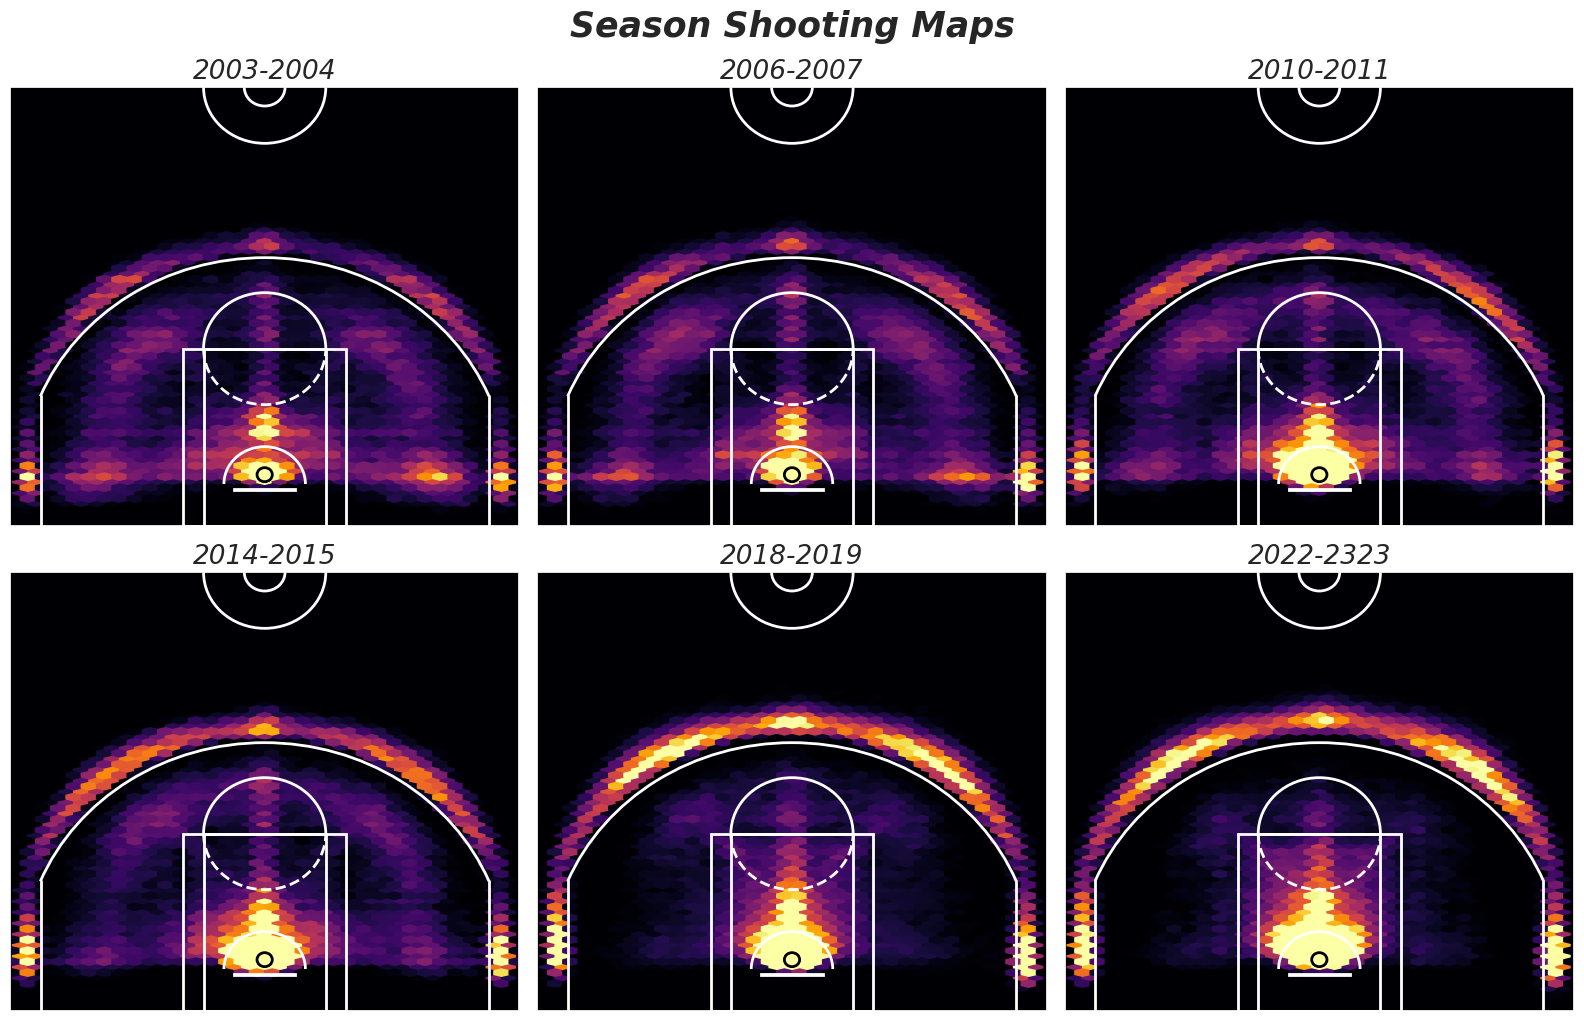

In [10]:
#Setting up plot
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(16,10.4),  sharex=True, sharey=True)
plt.xlim(-250, 250)
plt.ylim(0, 470)

#Ploting each court
ax1= ax[0,0].hexbin(shots_04['LOC_X'], 
           shots_04['LOC_Y'], 
           gridsize=(40, 40), 
           extent=(-300, 300, 0, 470), 
           cmap='inferno', 
           vmin=20, 
           vmax=450)

ax2 = ax[0,1].hexbin(shots_07['LOC_X'], 
           shots_07['LOC_Y'], 
           gridsize=(40, 40), 
           extent=(-300, 300, 0, 470), 
           cmap='inferno', 
           vmin=20, 
           vmax=450)

ax3 = ax[0,2].hexbin(shots_11['LOC_X'], 
           shots_11['LOC_Y'], 
           gridsize=(40, 40), 
           extent=(-300, 300, 0, 470), 
           cmap='inferno', 
           vmin=20, 
           vmax=450)

ax4 = ax[1,0].hexbin(shots_15['LOC_X'], 
           shots_15['LOC_Y'], 
           gridsize=(40, 40), 
           extent=(-300, 300, 0, 470), 
           cmap='inferno', 
           vmin=20, 
           vmax=450)

ax5 = ax[1,1].hexbin(shots_19['LOC_X'], 
           shots_19['LOC_Y'], 
           gridsize=(40, 40), 
           extent=(-300, 300, 0, 470), 
           cmap='inferno', 
           vmin=20, 
           vmax=450)


ax6 = ax[1,2].hexbin(shots_23["LOC_X"], 
           shots_23["LOC_Y"], 
           gridsize=(40, 40), 
           extent=(-300, 300, 0, 470), 
           cmap="inferno", 
           vmin=20, 
           vmax=450)

#Add labels to each court image
ax[0, 0].set_title('2003-2004', fontsize=19, fontweight='medium', fontstyle='oblique')
ax[0, 1].set_title('2006-2007', fontsize=19, fontweight='medium', fontstyle='oblique')
ax[0, 2].set_title('2010-2011', fontsize=19, fontweight='medium', fontstyle='oblique')
ax[1, 0].set_title('2014-2015', fontsize=19, fontweight='medium', fontstyle='oblique')
ax[1, 1].set_title('2018-2019', fontsize=19, fontweight='medium', fontstyle='oblique')
ax[1, 2].set_title('2022-2323', fontsize=19, fontweight='medium', fontstyle='oblique')

#Costimizing axis ticks and adding courts
for row in range(2):
    for col in range(3):
        ax[row, col].get_xaxis().set_visible(False)
        ax[row, col].get_yaxis().set_visible(False)
        draw_court(ax[row,col])
        
        
fig.suptitle("Season Shooting Maps", fontsize=25, fontweight='bold', fontstyle='oblique')
fig.tight_layout()


plt.show()

From shot charts from the 2003-2004 season to that of 2022-2023 we see a gradual movement away from the mid-range shot (long 2-Pointer) to an increase in 3-Pointers as the years went on. Along side the increase in 3s there was also an increase in shot concentrating around the ring pointing to a polarity in shot selection for players; either I shot a 3-Pointer or I take an easier to make shot around the rim

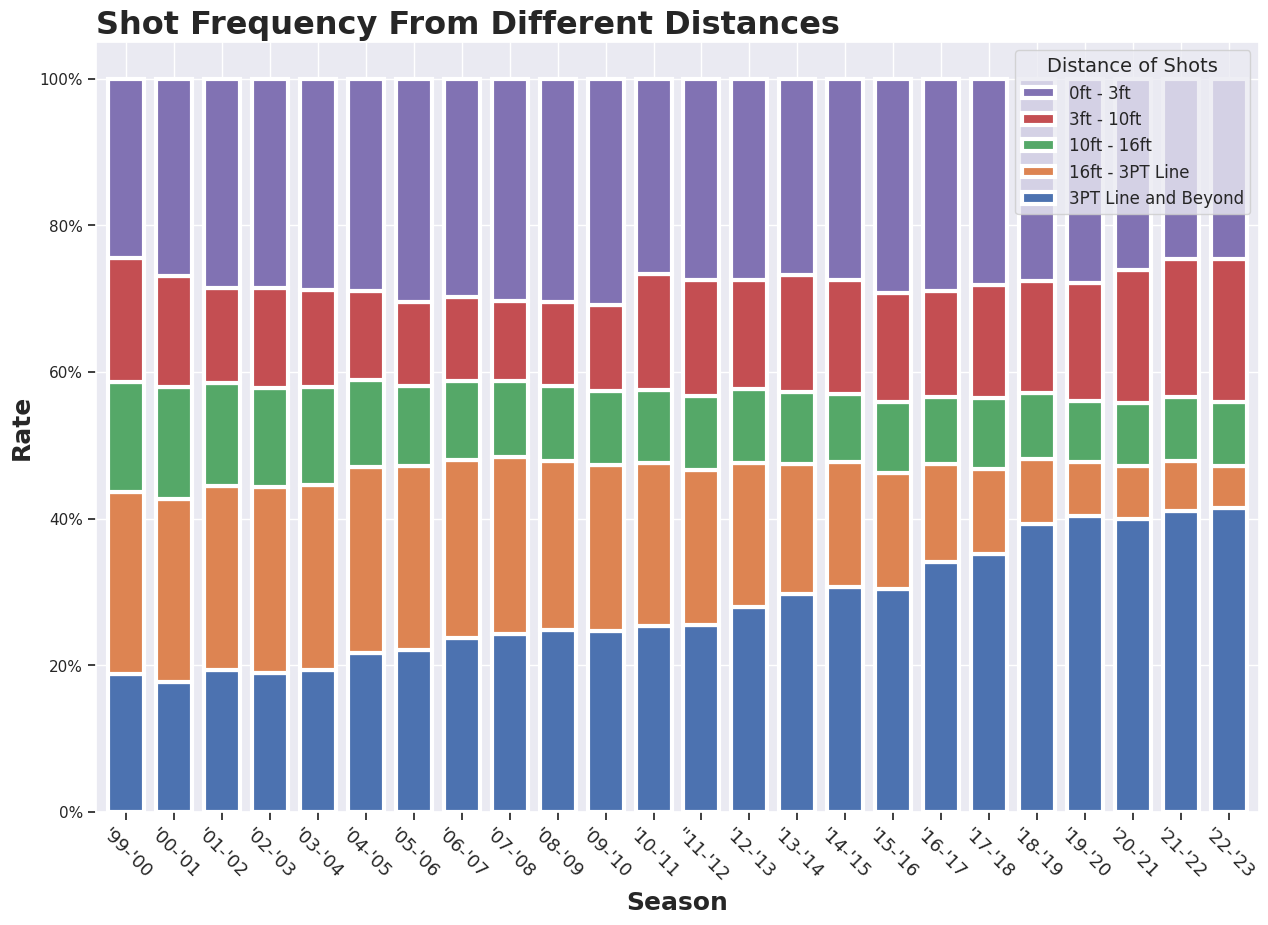

In [11]:
sns.set(rc={"figure.figsize":(15, 10)})
sns.color_palette("tab10")
sns.set(font_scale=1)

attempted = player_shooting.groupby('season')\
            [['percent_fga_from_x3p_range', 'percent_fga_from_x16_3p_range','percent_fga_from_x10_16_range',  'percent_fga_from_x3_10_range', 'percent_fga_from_x0_3_range']]\
            .mean()\
            .reset_index()

#plotting
ax = attempted.set_index('season').plot(kind='bar', 
                                   stacked=True,  
                                   width = 0.75, 
                                   edgecolor = "white", 
                                   linewidth=3)

#Y-AXIS
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y)))

#X-AXIS
ax.set_xticks(range(len(attempted.set_index('season'))))
ax.set_xticklabels(["'99-'00", "'00-'01", "'01-'02", "'02-'03", "'03-'04", "'04-'05", "'05-'06", "'06-'07", "'07-'08", "'08-'09", "'09-'10", "'10-'11", "''11-'12", "'12-'13", "'13-'14", "'14-'15", "'15-'16", "'16-'17", "'17-'18", "'18-'19", "'19-'20", "'20-'21","'21-'22", "'22-'23"], 
                  rotation=-45, size=13)
ax.tick_params(bottom=True, left=True)

#LABELS
ax.axes.set_title('Shot Frequency From Different Distances',fontsize=23, loc='left', fontweight='bold')
ax.set_xlabel("Season", fontsize=18, fontweight='bold')
ax.set_ylabel("Rate", fontsize=18, fontweight='bold')


#LEGEND
handles, labels = ax.get_legend_handles_labels()
ax.legend(reversed(handles), 
          reversed(["3PT Line and Beyond", "16ft - 3PT Line", "10ft - 16ft", "3ft - 10ft", "0ft - 3ft"]), 
          title='Distance of Shots', 
          loc='upper right',
          title_fontsize= 14,
          fontsize = 12)

# **(Playoffs vs non playoffs)**

IS there any connection between 3-Point shots attempted and a teams success

Was there actually any success coming from from shooting more 3s and  Using “Playoff appearances” by a team as our metric of success (making the playoffs signifies your are one of the top 8 teams in your respective conference) we see playoffs making teams continually attempted more 3s than their non playoff making counterparts since the beginning of the millennia

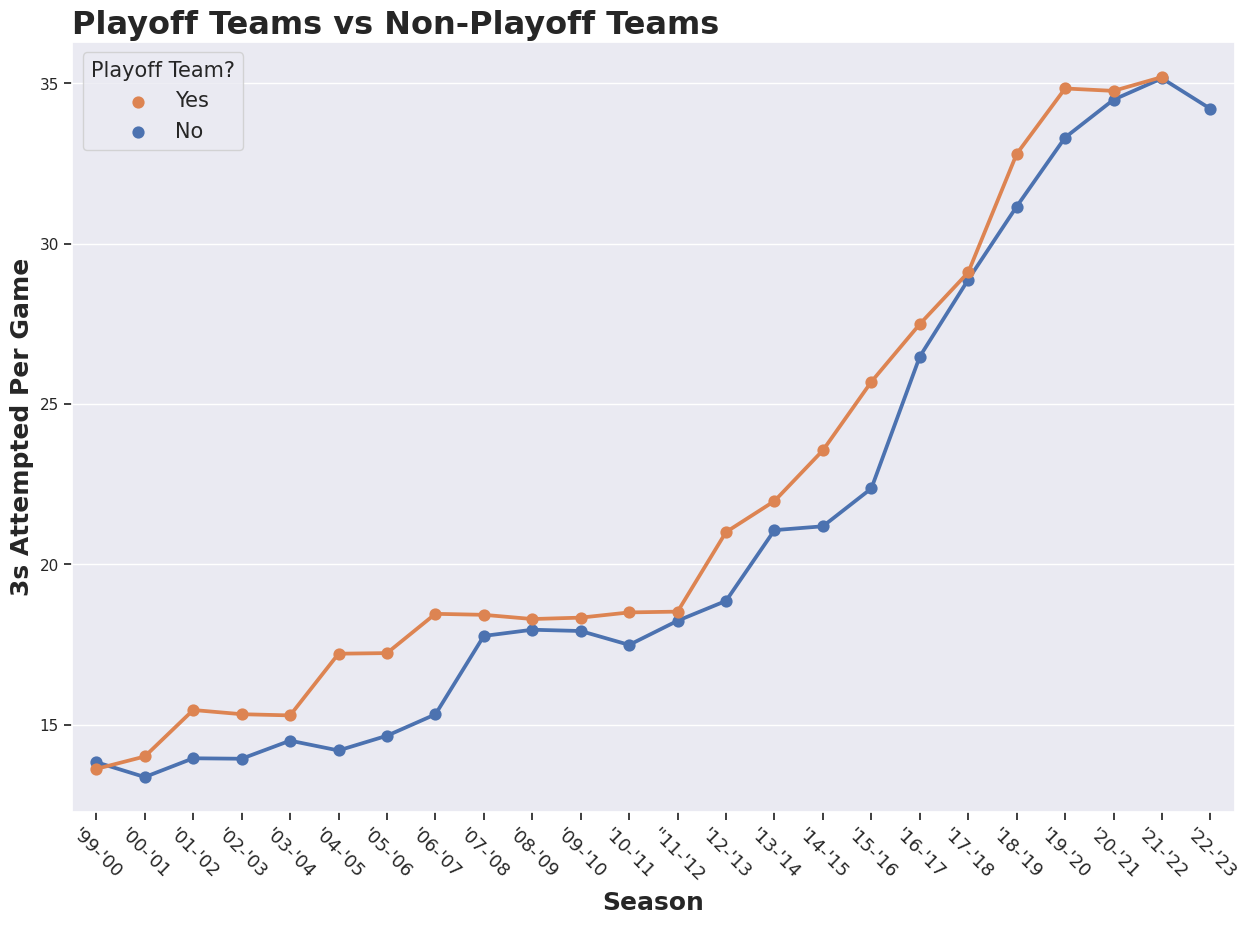

In [12]:
#costumizing plot
sns.set_theme(style="darkgrid")
sns.set(rc={"figure.figsize":(15, 10)})

#plotting
ax = sns.pointplot(data=team_totals, x='season', y='x3pa_per_game', hue='playoffs', errorbar=None)

ax.set_xticks(range(24))
ax.set_xticklabels(["'99-'00", "'00-'01", "'01-'02", "'02-'03", "'03-'04", "'04-'05", "'05-'06", "'06-'07", "'07-'08", "'08-'09", "'09-'10", "'10-'11", "''11-'12", "'12-'13", "'13-'14", "'14-'15", "'15-'16", "'16-'17", "'17-'18", "'18-'19", "'19-'20", "'20-'21","'21-'22", "'22-'23"], 
                  rotation=-45, size=13)
ax.tick_params(bottom=True, left=True)

#LABELS
ax.axes.set_title('Playoff Teams vs Non-Playoff Teams',fontsize=23, loc='left', fontweight='bold')
ax.set_xlabel("Season", fontsize=18, fontweight='bold')
ax.set_ylabel("3s Attempted Per Game", fontsize=18, fontweight='bold')


handles, labels = ax.get_legend_handles_labels()
ax.legend(reversed(handles), 
          reversed(["No", "Yes"]), 
          title='Playoff Team?', 
          loc='upper left',
          title_fontsize= 15, 
          fontsize = 15)

# Scoring Analysis

Here now we'll take a more granular look at how shooting habits have changed over time (using machine leariong algo). It would be hard to find two players one from today and one from the early 2000s who both fit the same physical molds and playstyles to compare 3-Point shooting with ;**HOWEVER** someone by the name of LeBron James exists.

Lebron provides us with a very unique look into a player that still plays at a relatively same pace and efficency today as he did in the early 2000s when he started his NBA career. Still averaging 25+ points per game in his 21st season he's found ways to evolve his playstyle with the times making him a prefect canidate for our study.

# **Acknowledgements**

Thank you to JP Hwang for his substack and medium articles which went extensively into nba data visualization

https://github.com/databyjp

Thank you you to ****Bradley Fay**** for providing a template for drawing NBA Courts within python

https://github.com/bradleyfay

****Dominic Samangy**** 

https://github.com/DomSamangy